In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'/Users/hyebin/Desktop/github/ML_study/1.회귀분석'

# 1. 데이터 불러오기

In [3]:
# 데이터 불러오기
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 1-1. 원핫인코딩

In [5]:
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [6]:
encodbox = pd.DataFrame(np.zeros((corolla.shape[0], 3), dtype = int), columns = corolla.Fuel_Type.unique())

for i in range(corolla.shape[0]):
    if corolla.loc[i, 'Fuel_Type'] == 'Diesel':
        encodbox.iloc[i, 0] = 1
    elif corolla.loc[i, 'Fuel_Type'] == 'Petrol':
        encodbox.iloc[i, 1] = 1
    else:
        encodbox.iloc[i, 2] = 1
        
encodbox

,Diesel,Petrol,CNG
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1431,0,1,0
1432,0,1,0
1433,0,1,0
1434,0,1,0


In [7]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis = 1)
mlr_data = pd.concat([corolla_, encodbox], axis = 1)
mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,Petrol,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,0,1,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,0,1,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,0,1,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,0,1,0


In [8]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant = 'add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,Petrol,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,1,0,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,1,0,0


# 2. 설명변수, 타겟변수 분리 및 학습데이터와 평가데이터 분할

In [9]:
# 특정 변수 제외 가능
feature_columns = list(mlr_data.columns.difference(['Price']))
feature_columns

['ABS',
 'Age_08_04',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic',
 'Automatic_airco',
 'BOVAG_Guarantee',
 'Backseat_Divider',
 'Boardcomputer',
 'CD_Player',
 'CNG',
 'Central_Lock',
 'Cylinders',
 'Diesel',
 'Doors',
 'Gears',
 'Guarantee_Period',
 'HP',
 'KM',
 'Met_Color',
 'Metallic_Rim',
 'Mfg_Month',
 'Mfg_Year',
 'Mfr_Guarantee',
 'Mistlamps',
 'Petrol',
 'Power_Steering',
 'Powered_Windows',
 'Quarterly_Tax',
 'Radio',
 'Radio_cassette',
 'Sport_Model',
 'Tow_Bar',
 'Weight',
 'cc',
 'const']

In [10]:
X = mlr_data[feature_columns]
y = mlr_data['Price']

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


# 3. 모델 적합

In [11]:
# 회귀 모델 적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [12]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     294.0
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        18:24:16   Log-Likelihood:                -8431.6
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     971   BIC:                         1.710e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -261.7674    132.046     -1.982      0.048    -520.896      -2.639
Age_08_04         -119.6957      4.001    -29.916      0.000    -127.547    -111.844
Airbag_1           140.6605    256.365      0.549      0.583    -362.432     643.753
Airbag_2          -126.5952    136.609     -0.927      0.354    -394.677     141.487
Airco              153.1279     93.551      1.637      0.102     -30.457     336.712
Automatic          324.2903    157.140      2.064      0.039      15.917     632.664
Automatic_airco   2399.7095    199.902     12.004      0.000    2007.419    2792.000
BOVAG_Guarantee    454.8335    134.229      3.388      0.001     191.422     718.245
Backseat_Divider  -331.5164    134.346     -2.468      0.014    -595.158     -67.875
Boardcomputer     -255.2471    122.123     -2.090      0.037    -494.903     -15.592
CD_Player          251.7057    104.304      2.413      0.016      47.018     456.394
CNG               -890.4048    217.422     -4.095      0.000   -1317.076    -463.733
Central_Lock      -238.4943    153.625     -1.552      0.121    -539.969      62.981
Cylinders           -0.0320      0.002    -14.335      0.000      -0.036      -0.028
Diesel            -176.0450    186.385     -0.945      0.345    -541.808     189.718
Doors               25.5150     42.083      0.606      0.544     -57.069     108.099
Gears              153.5363    199.312      0.770      0.441    -237.595     544.668
Guarantee_Period    65.8462     13.998      4.704      0.000      38.376      93.317
HP                  14.7794      3.753      3.938      0.000       7.414      22.145
KM                  -0.0184      0.001    -13.968      0.000      -0.021      -0.016
Met_Color          -96.8720     79.486     -1.219      0.223    -252.856      59.112
Metallic_Rim       232.7898     99.808      2.332      0.020      36.925     428.655
Mfg_Month          -93.8237     10.749     -8.729      0.000    -114.917     -72.731
Mfg_Year             1.7716      0.814      2.178      0.030       0.175       3.368
Mfr_Guarantee      287.9230     76.464      3.765      0.000     137.869     437.977
Mistlamps           21.1975    114.109      0.186      0.853    -202.732     245.127
Petrol            1066.4418    190.182      5.607      0.000     693.226    1439.658
Power_Steering     183.8940    298.519      0.616      0.538    -401.922     769.710
Powered_Windows    597.0235    154.924      3.854      0.000     292.999     901.048
Quarterly_Tax       15.3401      1.935      7.927      0.000      11.543      19.138
Radio             -687.5411    792.320     -0.868      0.386   -2242.397     867.315
Radio_cassette     577.0638    793.813      0.727      0.467    -980.724    2134.851
Sport_Model        253.5954     91.962      2.758      0.006      73.128     434.063
Tow_Bar           -122.

# 4. VIF를 통한 다중공선성 확인

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mlr_data.values, i) for i in range(len(mlr_data.columns))]
vif['features'] = mlr_data.columns
vif

/Users/hyebin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/hyebin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


# 5. 시각화를 통한 검증

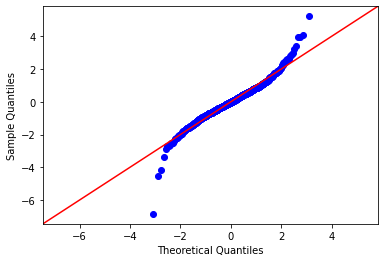

In [15]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot 
fig = sm.qqplot(res, fit = True, line = '45')

Text(0, 0.5, 'Residual')

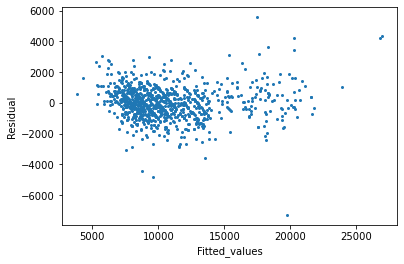

In [16]:
# residual pattern 확인
import matplotlib.pyplot as plt

pred_y = fitted_full_model.predict(train_x)
fig = plt.scatter(pred_y, res, s = 4)
plt.xlabel('Fitted_values')
plt.ylabel('Residual')

# 이정도면 잔차가 균등하게 있음

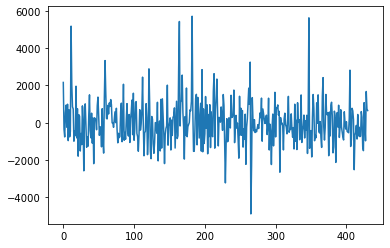

In [17]:
# 검증 데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)
plt.plot(np.array(test_y - pred_y2))

# 6. MSE로 검증

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(test_y, pred_y2)

1426885.8145466105

# 7. 변수선택법 - 직접 함수 만들어서

In [22]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # 모델링
    regression = model.fit() # 모델 학습
    AIC = regression.aic # 모델의 aic
    return {'model': regression, 'AIC': AIC}

print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f9bbb9a3550>, 'AIC': 19050.306108275847}


In [25]:
import time
import itertools

# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X, y, k):
    tic = time.time() # 시작 시간
    results = [] # 결과 저장 공간
    
    # 각 변수 조합을 고려한 경우의 수
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        combo = list(combo) + ['const']
        results.append(processSubset(X, y, feature_set = combo))
    models = pd.DataFrame(results) 
    
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time() # 종료 시간
    print('Processed ', models.shape[0], 'models on ', k, 'predictors in ', toc - tic, 'seconds')
    return best_model

In [26]:
print(getBest(X = train_x, y = train_y, k = 2))

Processed  630 models on  2 predictors in  1.2511439323425293 seconds
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17511.4
Name: 211, dtype: object


In [27]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns = ['AIC', 'model'])
tic = time.time()

for i in range(1, 4):
    models.loc[i] = getBest(X = train_x, y = train_y, k = i) # i개의 변수 사용한 모델 중 best aic 모델 추출

toc = time.time()
print('Total elapsed time: ', toc - tic, 'seconds')

Processed  36 models on  1 predictors in  0.1060788631439209 seconds
Processed  630 models on  2 predictors in  1.7627110481262207 seconds
Processed  7140 models on  3 predictors in  14.36391019821167 seconds
Total elapsed time:  16.67235279083252 seconds


In [28]:
models # 3개의 변수를 사용했을 때 가장 aic가 낮은 모델

,AIC,model
1,17759.674222,<statsmodels.regression.linear_model.Regressio...
2,17511.369278,<statsmodels.regression.linear_model.Regressio...
3,17331.232330,<statsmodels.regression.linear_model.Regressio...


In [29]:
models.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1987.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        18:45:27   Log-Likelihood:                -8661.6
No. Observations:                1005   AIC:                         1.733e+04
Df Residuals:                    1001   BIC:                         1.735e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0253      0.001    -19.089      0.000      -0.028      -0.023
Mfg_Year    1489.2917     36.838     40.428      0.000    1417.003    1561.581
Weight        17.1315      0.950     18.027      0.000      15.267      18.996
const      -2.984e+06   7.32e+04    -40.757      0.000   -3.13e+06   -2.84e+06
==============================================================================
Omnibus:                      185.502   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1770.171
Skew:                          -0.541   Prob(JB):                         0.00
Kurtosis:                       9.411   Cond. No.                     1.36e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# 모든 변수를 사용한 것과 비교
print('full model Rsquared: ', '{:.5f}'.format(fitted_full_model.rsquared))
print('selected model Rsquared: ', '{:.5f}'.format(models.loc[3, 'model'].rsquared))
print('')
print('full model AIC: ', '{:.5f}'.format(fitted_full_model.aic))
print('selected model AIC: ', '{:.5f}'.format(models.loc[3, 'model'].aic))

full model Rsquared:  0.90902
selected model Rsquared:  0.85620

full model AIC:  16931.17652
selected model AIC:  17331.23233


## 7-1. 시각화

Text(0, 0.5, 'BIC')

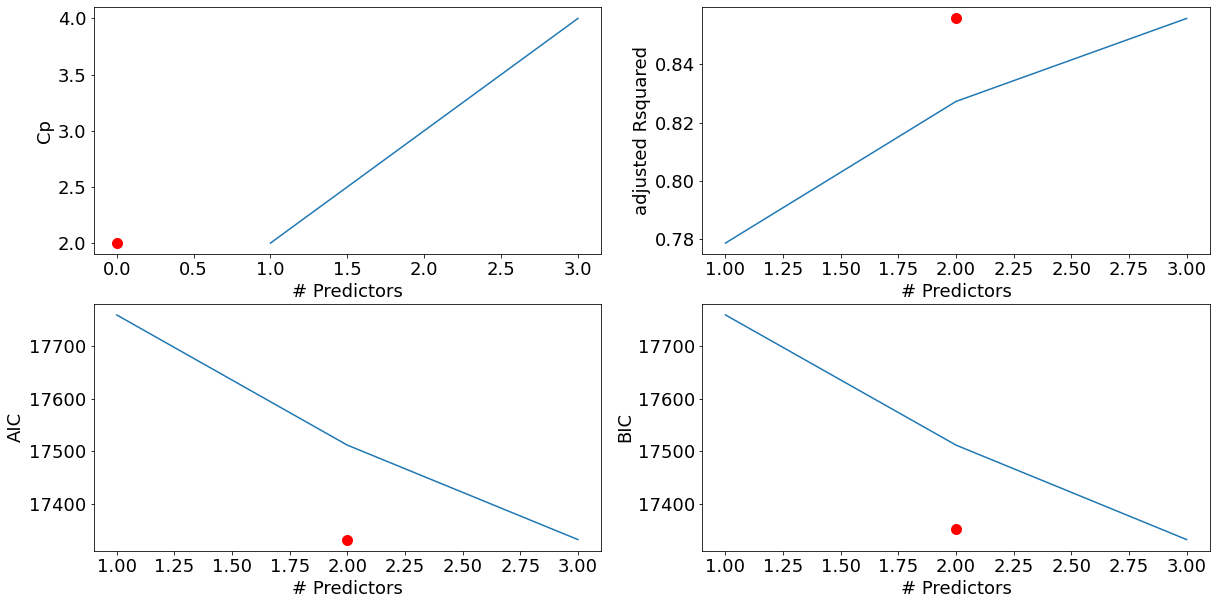

In [36]:
# plot the result
plt.figure(figsize = (20, 10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Mallow Cp
plt.subplot(2, 2, 1)
Cp = models.apply(lambda row: (row[1].params.shape[0] + (row[1].mse_total - 
                               fitted_full_model.mse_total) * (train_x.shape[0] -
                               row[1].params.shape[0]) / fitted_full_model.mse_total),
                               axis = 1)

plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('Cp')


# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis = 1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('adjusted Rsquared')


# aic
aic = models.apply(lambda row: row[1].aic, axis = 1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('AIC')


# bic
bic = models.apply(lambda row: row[1].bic, axis = 1)
plt.subplot(2, 2, 4)
plt.plot(aic)
plt.plot(bic.argmin(), bic.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('BIC')

# 8. 전진선택법

In [45]:
# step 1

def forward(X, y, predictors):
    
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    # 즉 이미 선택된 변수들은 predictors에 들어있음
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X, y, predictors + [p] + ['const']))
    
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 모델 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed ', models.shape[0], 'models on ', len(predictors) + 1, 'predictors in ', toc - tic)
    print('Selected predictors: ', best_model['model'].model.exog_names, 'AIC: ', best_model['AIC'])
    return best_model

In [46]:
# 전진선택법 모델

def forward_model(X, y):
    Fmodels = pd.DataFrame(columns = ['AIC', 'model'])
    tic = time.time()
    
    # 미리 모델에 사용된 변수
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X = X, y = y, predictors = predictors)
        
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
            
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names # 사용된 변수들을 가져옴
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    
    return Fmodels['model'][len(Fmodels['model'])]        

In [47]:
Forward_best_model = forward_model(train_x, train_y)

Processed  36 models on  1 predictors in  0.10079789161682129
Selected predictors:  ['Mfg_Year', 'const'] AIC:  17759.67422183842
Processed  35 models on  2 predictors in  0.09026193618774414
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  17511.36927822907
Processed  34 models on  3 predictors in  0.06398200988769531
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'const'] AIC:  17345.867258870596
Processed  33 models on  4 predictors in  0.07584428787231445
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const'] AIC:  17148.199362982716
Processed  32 models on  5 predictors in  0.07219910621643066
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'const'] AIC:  17091.61169515882
Processed  31 models on  6 predictors in  0.06209301948547363
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'const'] AIC:  17056.557140297446
Processed  30 models on 

In [48]:
Forward_best_model.aic

16917.7348332198

In [49]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     423.1
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        19:18:40   Log-Likelihood:                -8434.9
No. Observations:                1005   AIC:                         1.692e+04
Df Residuals:                     981   BIC:                         1.704e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1151.4289    127.744      9.014      0.000     900.746    1402.111
Automatic_airco   2426.2394    186.532     13.007      0.000    2060.191    2792.287
KM                  -0.0183      0.001    -13.982      0.000      -0.021      -0.016
Weight               9.7595      1.137      8.586      0.000       7.529      11.990
Powered_Windows    605.6657    152.550      3.970      0.000     306.304     905.027
HP                  14.6457      3.594      4.075      0.000       7.593      21.698
Quarterly_Tax       14.9513      1.873      7.984      0.000      11.277      18.626
Petrol            -5.75e+05    6.4e+04     -8.987      0.000   -7.01e+05   -4.49e+05
Guarantee_Period    67.6984     13.649      4.960      0.000      40.914      94.482
Mfr_Guarantee      271.6683     75.529      3.597      0.000     123.451     419.886
BOVAG_Guarantee    468.8800    132.239      3.546      0.000     209.376     728.384
Metallic_Rim       254.4703     92.626      2.747      0.006      72.703     436.238
Backseat_Divider  -319.2724    119.308     -2.676      0.008    -553.401     -85.144
Sport_Model        245.9452     86.025      2.859      0.004      77.131     414.759
ABS               -291.4559    101.741     -2.865      0.004    -491.110     -91.802
Age_08_04          -22.9671     10.611     -2.164      0.031     -43.791      -2.143
Tow_Bar           -148.1291     79.194     -1.870      0.062    -303.538       7.279
CD_Player          233.7379    100.608      2.323      0.020      36.305     431.170
Boardcomputer     -248.0945    120.189     -2.064      0.039    -483.952     -12.237
Diesel           -5.762e+05    6.4e+04     -9.010      0.000   -7.02e+05   -4.51e+05
Automatic          296.2737    154.508      1.918      0.055      -6.931     599.478
Airco              155.0627     89.373      1.735      0.083     -20.321     330.446
Central_Lock      -231.1761    150.664     -1.534      0.125    -526.838      64.486
CNG              -5.769e+05    6.4e+04     -9.019      0.000   -7.02e+05   -4.51e+05
const            -1.728e+06   1.92e+05     -9.005      0.000    -2.1e+06   -1.35e+06
==============================================================================
Omnibus:                       99.215   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.396
Skew:                          -0.058   Prob(JB):                    5.94e-147
Kurtosis:                       7.008   Cond. No.                     1.11e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.05e-30. This might indicate that there are
strong multicollinearity problems or that the design 

# 9. 후진소거법

In [50]:
# 처음에 모든 변수 넣은 모델 사용 후 점차 필요없는 변수 제거

def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results. append(processSubset(X, y, list(combo) + ['const']))
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed ', models.shape[0], 'models on ', len(predictors) - 1, 'predictors in ', toc - tic)
    print('Selected predictors: ', best_model['model'].model.exog_names, 'AIC: ', best_model['AIC'])
    return best_model

In [53]:
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns = ['AIC', 'model'], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    
    while len(predictors) > 1:
        Backward_result = backward(train_x, train_y, predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    return Bmodels['model'].dropna().iloc[0]

In [54]:
Backward_best_model = backward_model(train_x, train_y)

Processed  36 models on  35 predictors in  0.22125506401062012
Selected predictors:  ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'] AIC:  16929.212236265197
Processed  35 models on  34 predictors in  0.1912548542022705
Selected predictors:  ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Pow

In [55]:
Backward_best_model.aic

16917.734833219823

In [56]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     423.1
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        19:27:57   Log-Likelihood:                -8434.9
No. Observations:                1005   AIC:                         1.692e+04
Df Residuals:                     981   BIC:                         1.704e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -291.4559    101.741     -2.865      0.004    -491.110     -91.802
Age_08_04          -22.9671     10.611     -2.164      0.031     -43.791      -2.143
Airco              155.0627     89.373      1.735      0.083     -20.321     330.446
Automatic          296.2737    154.508      1.918      0.055      -6.931     599.478
Automatic_airco   2426.2394    186.532     13.007      0.000    2060.191    2792.287
BOVAG_Guarantee    468.8800    132.239      3.546      0.000     209.376     728.384
Backseat_Divider  -319.2724    119.308     -2.676      0.008    -553.401     -85.144
Boardcomputer     -248.0945    120.189     -2.064      0.039    -483.952     -12.237
CD_Player          233.7379    100.608      2.323      0.020      36.305     431.170
CNG              -1987.6926    354.248     -5.611      0.000   -2682.864   -1292.521
Central_Lock      -231.1761    150.664     -1.534      0.125    -526.838      64.486
Cylinders        -5.419e+05   6.02e+04     -9.001      0.000    -6.6e+05   -4.24e+05
Diesel           -1262.3875    292.941     -4.309      0.000   -1837.251    -687.524
Guarantee_Period    67.6984     13.649      4.960      0.000      40.914      94.482
HP                  14.6457      3.594      4.075      0.000       7.593      21.698
KM                  -0.0183      0.001    -13.982      0.000      -0.021      -0.016
Metallic_Rim       254.4703     92.626      2.747      0.006      72.703     436.238
Mfg_Year          1151.4289    127.744      9.014      0.000     900.746    1402.111
Mfr_Guarantee      271.6683     75.529      3.597      0.000     123.451     419.886
Powered_Windows    605.6657    152.550      3.970      0.000     306.304     905.027
Quarterly_Tax       14.9513      1.873      7.984      0.000      11.277      18.626
Sport_Model        245.9452     86.025      2.859      0.004      77.131     414.759
Tow_Bar           -148.1291     79.194     -1.870      0.062    -303.538       7.279
Weight               9.7595      1.137      8.586      0.000       7.529      11.990
const            -1.355e+05   1.51e+04     -9.001      0.000   -1.65e+05   -1.06e+05
==============================================================================
Omnibus:                       99.215   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.396
Skew:                          -0.058   Prob(JB):                    5.94e-147
Kurtosis:                       7.008   Cond. No.                     5.22e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-29. This might indicate that there are
strong multicollinearity problems or that the design 

# 10. 단계적 선택법(stepwise)

In [65]:
def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns = ['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors + ['const'])['AIC']
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X, y, predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X, y, predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
            
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    return Stepmodels['model'][len(Stepmodels['model'])]

In [66]:
Stepwise_best_model = Stepwise_model(train_x, train_y)

Processed  36 models on  1 predictors in  0.1406552791595459
Selected predictors:  ['Mfg_Year', 'const'] AIC:  17759.67422183842
forward
Processed  1 models on  0 predictors in  0.0044209957122802734
Selected predictors:  ['const'] AIC:  19274.281787864846
Processed  35 models on  2 predictors in  0.08601713180541992
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  17511.36927822907
forward
Processed  2 models on  1 predictors in  0.009292840957641602
Selected predictors:  ['Mfg_Year', 'const'] AIC:  17759.67422183842
Processed  34 models on  3 predictors in  0.11537909507751465
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'const'] AIC:  17345.867258870596
forward
Processed  3 models on  2 predictors in  0.008131027221679688
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  17511.36927822907
Processed  33 models on  4 predictors in  0.07742595672607422
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const'] AI

In [67]:
Stepwise_best_model.aic

16917.734833219773

In [68]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     423.1
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        19:41:42   Log-Likelihood:                -8434.9
No. Observations:                1005   AIC:                         1.692e+04
Df Residuals:                     981   BIC:                         1.704e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1151.4289    127.744      9.014      0.000     900.746    1402.111
Automatic_airco   2426.2394    186.532     13.007      0.000    2060.191    2792.287
KM                  -0.0183      0.001    -13.982      0.000      -0.021      -0.016
Weight               9.7595      1.137      8.586      0.000       7.529      11.990
Powered_Windows    605.6657    152.550      3.970      0.000     306.304     905.027
HP                  14.6457      3.594      4.075      0.000       7.593      21.698
Quarterly_Tax       14.9513      1.873      7.984      0.000      11.277      18.626
Guarantee_Period    67.6984     13.649      4.960      0.000      40.914      94.482
Mfr_Guarantee      271.6683     75.529      3.597      0.000     123.451     419.886
BOVAG_Guarantee    468.8800    132.239      3.546      0.000     209.376     728.384
Metallic_Rim       254.4703     92.626      2.747      0.006      72.703     436.238
Backseat_Divider  -319.2724    119.308     -2.676      0.008    -553.401     -85.144
Sport_Model        245.9452     86.025      2.859      0.004      77.131     414.759
ABS               -291.4559    101.741     -2.865      0.004    -491.110     -91.802
Age_08_04          -22.9671     10.611     -2.164      0.031     -43.791      -2.143
Tow_Bar           -148.1291     79.194     -1.870      0.062    -303.538       7.279
CD_Player          233.7379    100.608      2.323      0.020      36.305     431.170
Boardcomputer     -248.0945    120.189     -2.064      0.039    -483.952     -12.237
Diesel           -1262.3875    292.941     -4.309      0.000   -1837.251    -687.524
Automatic          296.2737    154.508      1.918      0.055      -6.931     599.478
Airco              155.0627     89.373      1.735      0.083     -20.321     330.446
Central_Lock      -231.1761    150.664     -1.534      0.125    -526.838      64.486
CNG              -1987.6926    354.248     -5.611      0.000   -2682.864   -1292.521
const            -2.303e+06   2.56e+05     -9.001      0.000   -2.81e+06    -1.8e+06
==============================================================================
Omnibus:                       99.215   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.396
Skew:                          -0.058   Prob(JB):                    5.94e-147
Kurtosis:                       7.008   Cond. No.                     5.89e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 11. 성능평가

In [70]:
# the number of params

print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (25,) (24,)


In [72]:
print(Forward_best_model.model.exog_names)

['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Metallic_Rim', 'Backseat_Divider', 'Sport_Model', 'ABS', 'Age_08_04', 'Tow_Bar', 'CD_Player', 'Boardcomputer', 'Diesel', 'Automatic', 'Airco', 'Central_Lock', 'CNG', 'const']


In [73]:
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [74]:
perf_mat = pd.DataFrame(columns = ['ALL', 'FORWARD', 'BACKWARD', 'STEPWISE'],
                        index = ['MSE', 'RMSE', 'MAE', 'MAPE'])

In [75]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [77]:
from sklearn import metrics

perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y, pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y, pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y, pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y, pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

In [79]:
print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.42689e+06  1.40838e+06  1.40838e+06  1.40838e+06
RMSE      1194.52      1186.75      1186.75      1186.75
MAE       885.736       880.11       880.11       880.11
MAPE      8.54669      8.48449      8.48449      8.48449


In [80]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
25
25
24
